In [42]:
#DATA UNDERSTANDING BUT WITH CLASS DISTINCTION

import pandas as pd

df = pd.read_csv("C:/Users/max dore/Desktop/Data3402 kaggle challenge (churn)/train.csv")
df2 = df.copy()

target_variable = 'Exited'

#Unique classes
classes = df2['Exited'].unique()

class_dfs = {cls: df2[df2['Exited'] == cls] for cls in classes}

#storing the different class-based Df's in variables

df2_true = class_dfs[1] # Represents df for people who left/churned
df2_false = class_dfs[0] # Represents df for people who did not leave/churn



In [ ]:
# df2_true ---------------------------------------------------------------------

In [3]:
df2_true

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
18,18,15671358,Hargreaves,645,Germany,Female,55.0,8,120105.43,1,1.0,0.0,125083.29,1
19,19,15650670,Ts'ui,559,France,Male,61.0,1,153711.26,1,0.0,1.0,180890.40,1
23,23,15576044,Akabueze,554,Germany,Male,44.0,9,121823.26,1,1.0,0.0,79577.68,1
25,25,15671137,Sazonova,703,Spain,Male,39.0,9,0.00,1,1.0,0.0,131363.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165007,165007,15674851,Gaffney,767,France,Male,38.0,3,0.00,1,1.0,0.0,152872.84,1
165012,165012,15815050,Trevisani,746,Germany,Female,60.0,3,108805.42,2,1.0,0.0,78744.37,1
165022,165022,15798960,Hao,577,France,Female,45.0,2,0.00,1,0.0,0.0,148811.14,1
165024,165024,15734886,Martin,592,Germany,Female,33.0,3,110993.29,2,1.0,1.0,176747.66,1


In [7]:
# no missing values

any_missing = df2_true.isnull().any().any()

print(any_missing)

rows, columns = df2_true.shape

print("# Rows:", rows)
print("# Columns:", columns)

False
# Rows: 34921
# Columns: 14


In [44]:
# Descriptive Stats

descriptive_stats = df2_true.describe()

print(descriptive_stats)

                  id    CustomerId   CreditScore           Age        Tenure  \
count   34921.000000  3.492100e+04  34921.000000  34921.000000  34921.000000   
mean    82747.524384  1.569063e+07    652.220469     43.958478      4.914378   
std     47538.333677  7.186487e+04     81.136331      9.004380      2.826564   
min         5.000000  1.556571e+07    350.000000     18.000000      0.000000   
25%     41656.000000  1.563151e+07    593.000000     38.000000      3.000000   
50%     82515.000000  1.568776e+07    651.000000     44.000000      5.000000   
75%    124032.000000  1.575606e+07    708.000000     50.000000      7.000000   
max    165033.000000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count   34921.000000   34921.000000  34921.000000    34921.000000   
mean    71209.978085       1.327854      0.735546        0.294866   
std     62646.691947       0.661912      0.441048        0.455989   
min

In [43]:
# DROPPING the "Surname" feature. It is not very relevant to predicting churn. (USED)

df2_true = df2_true.drop(columns=['Surname'])

In [45]:
# Numerical vs. Categorical features

numerical_features = df2_true.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df2_true.select_dtypes(include=['object', 'category']).columns

numerical_features_count = len(numerical_features)
categorical_features_count = len(categorical_features)

dtypes = df2_true.dtypes

print("Numerical Features:", numerical_features_count)
print("Categorical Features:", categorical_features_count)

Numerical Features: 11
Categorical Features: 2


In [46]:
#Using IQR to look for outliers

outliers_dict = {}

for column in df2_true.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df2_true[column].quantile(0.25)
    Q3 = df2_true[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2_true[(df2_true[column] < lower_bound) | (df2_true[column] > upper_bound)]
    outliers_dict[column] = outliers

for column, outlier_data in outliers_dict.items():
    print(f"Outliers in {column} column:")
    print(outlier_data, "\n")


Outliers in id column:
Empty DataFrame
Columns: [id, CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: [] 

Outliers in CustomerId column:
Empty DataFrame
Columns: [id, CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: [] 

Outliers in CreditScore column:
            id  CustomerId  CreditScore Geography  Gender   Age  Tenure  \
8612      8612    15690113          405    France  Female  32.0       7   
14441    14441    15661591          413     Spain    Male  39.0       2   
20723    20723    15631201          418     Spain  Female  28.0       2   
21099    21099    15803202          350    France    Male  51.0      10   
26121    26121    15709324          417    France  Female  41.0       7   
34265    34265    15656148          376   Germany    Male  29.0       2   
43063    43063    15630592          414

In [12]:
#Table for df2_true

from tabulate import tabulate

def get_type(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Numerical'
    else:
        return 'Categorical'

def get_values(col):
    if pd.api.types.is_numeric_dtype(col):
        return f"{col.min()} to {col.max()}"
    else:
        return ', '.join(map(str, col.unique()))

def get_outliers_count(col):
    if pd.api.types.is_numeric_dtype(col):
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return ((col < lower_bound) | (col > upper_bound)).sum()
    else:
        return "N/A"

def get_mean(col):
    if pd.api.types.is_numeric_dtype(col):
        return col.mean()
    else:
        return "N/A"

info_table = pd.DataFrame({
    'Feature': df2_true.columns,
    'Type': df2_true.apply(lambda col: get_type(col)),
    'Values/Range': df2_true.apply(lambda col: get_values(col)),
    'Missing Values': df2_true.isnull().sum(),
    'Data Type': df2_true.dtypes,
    'Outliers Count': df2_true.apply(lambda col: get_outliers_count(col)),
    'Mean': df2_true.apply(lambda col: get_mean(col))
})

print(tabulate(info_table, headers='keys', tablefmt='pipe', showindex=False))


| Feature         | Type        | Values/Range           |   Missing Values | Data Type   | Outliers Count   | Mean                |
|:----------------|:------------|:-----------------------|-----------------:|:------------|:-----------------|:--------------------|
| id              | Numerical   | 5 to 165033            |                0 | int64       | 0                | 82747.52438360872   |
| CustomerId      | Numerical   | 15565706 to 15815690   |                0 | int64       | 0                | 15690634.222473584  |
| CreditScore     | Numerical   | 350 to 850             |                0 | int64       | 38               | 652.2204690587325   |
| Geography       | Categorical | Germany, France, Spain |                0 | object      | N/A              | N/A                 |
| Gender          | Categorical | Male, Female           |                0 | object      | N/A              | N/A                 |
| Age             | Numerical   | 18.0 to 92.0           |           

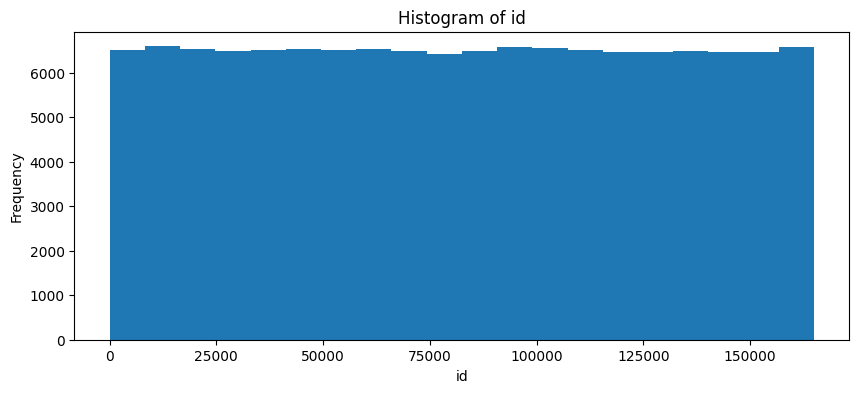

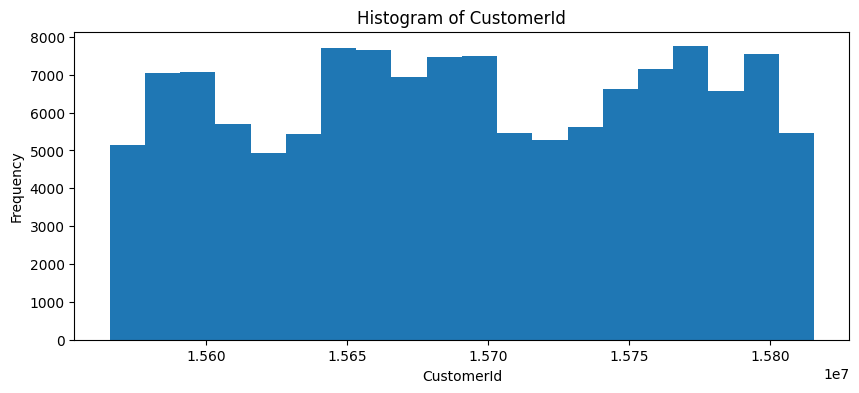

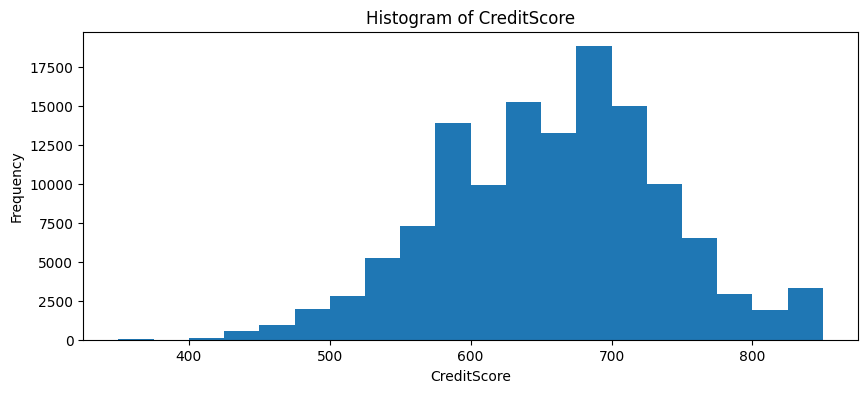

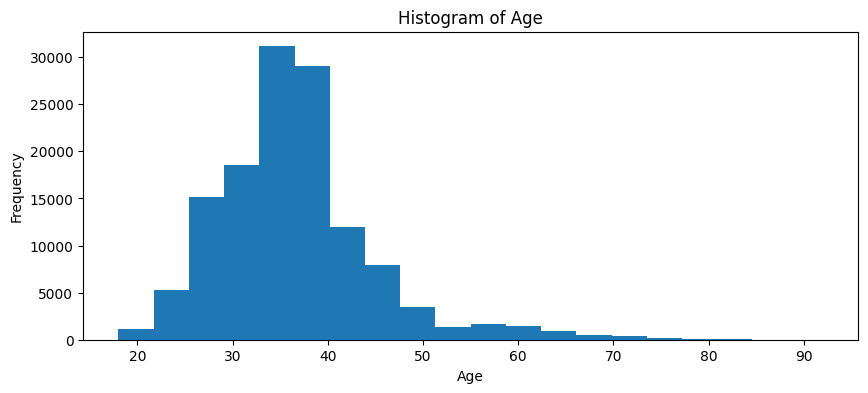

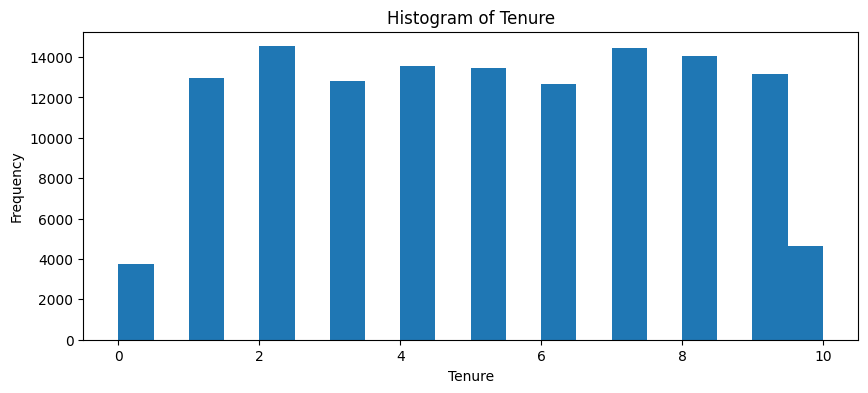

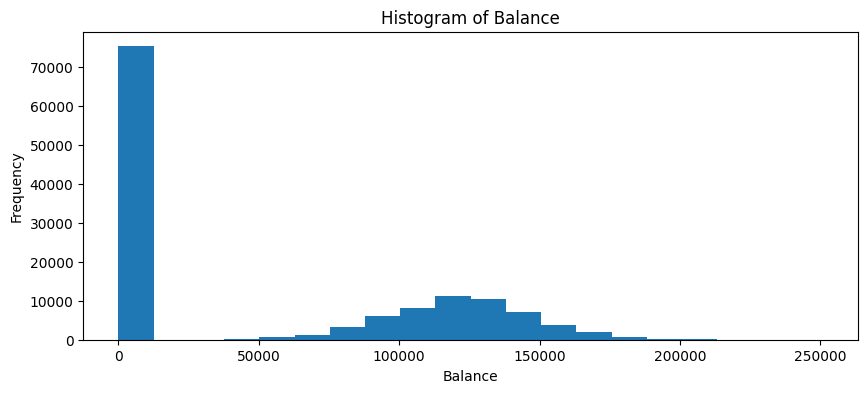

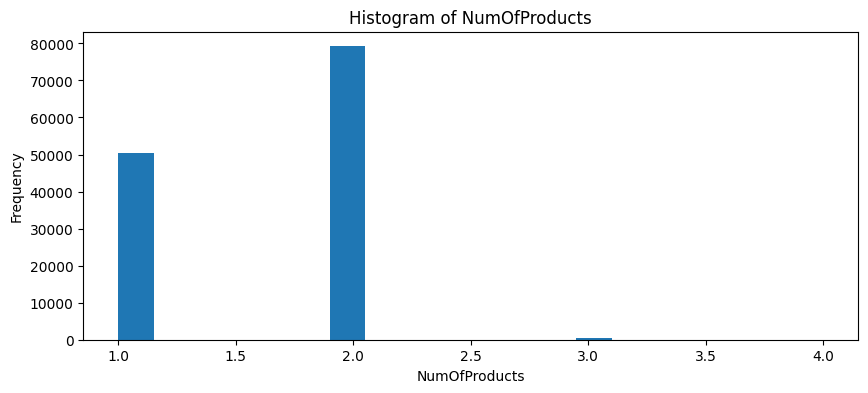

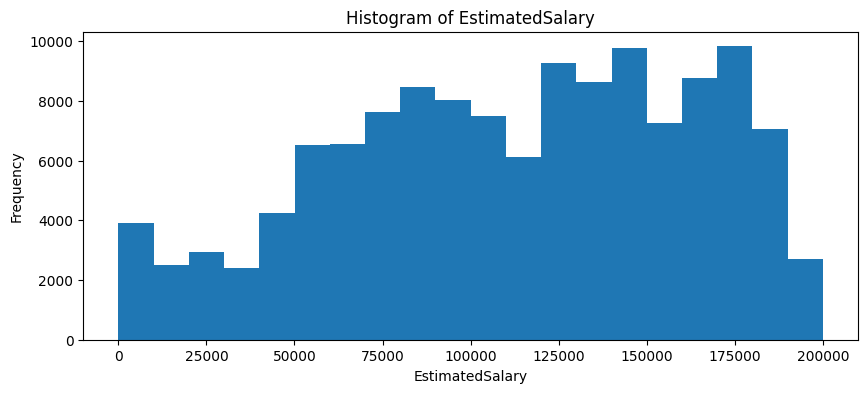

In [25]:
#Histograms for df2_true

import matplotlib.pyplot as plt

exclude_columns = ['HasCrCard', 'Exited', 'IsActiveMember']

numerical_cols = df2_true.select_dtypes(include=['int64', 'float64']).columns
cols_to_plot = [col for col in numerical_cols if col not in exclude_columns]

for col in cols_to_plot:
    plt.figure(figsize=(10, 4))
    df2_true[col].hist(bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


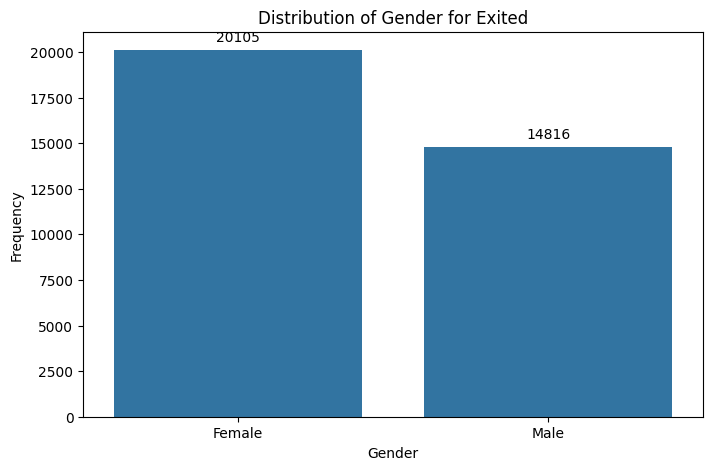

In [47]:
# Bar Graph for Gender

# Plot for df2_true
gender_counts_true = df2_true['Gender'].value_counts()
plt.figure(figsize=(8, 5))
barplot_true = sns.barplot(x=gender_counts_true.index, y=gender_counts_true.values)
plt.title('Distribution of Gender for Exited')
plt.xlabel('Gender')
plt.ylabel('Frequency')
for p in barplot_true.patches:
    barplot_true.annotate(format(p.get_height(), '.0f'),
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 9),
                          textcoords='offset points')
plt.show()


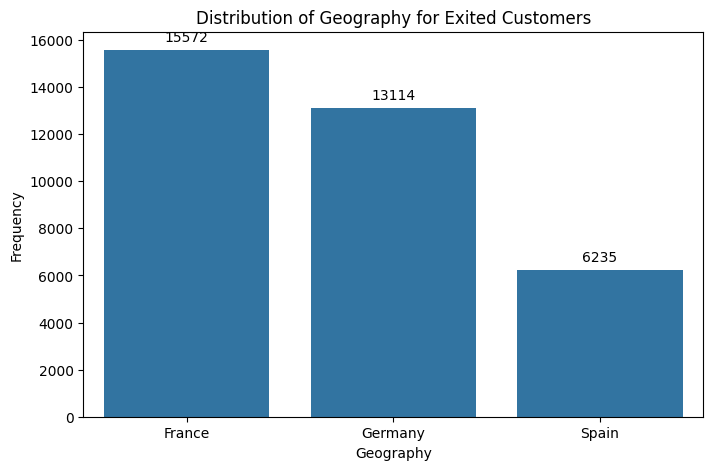

In [49]:
#Bar Graph for Geography

geography_counts_true = df2_true['Geography'].value_counts()

plt.figure(figsize=(8, 5))
barplot_true = sns.barplot(x=geography_counts_true.index, y=geography_counts_true.values)
plt.title('Distribution of Geography for Exited Customers')
plt.xlabel('Geography')
plt.ylabel('Frequency')

for p in barplot_true.patches:
    barplot_true.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()


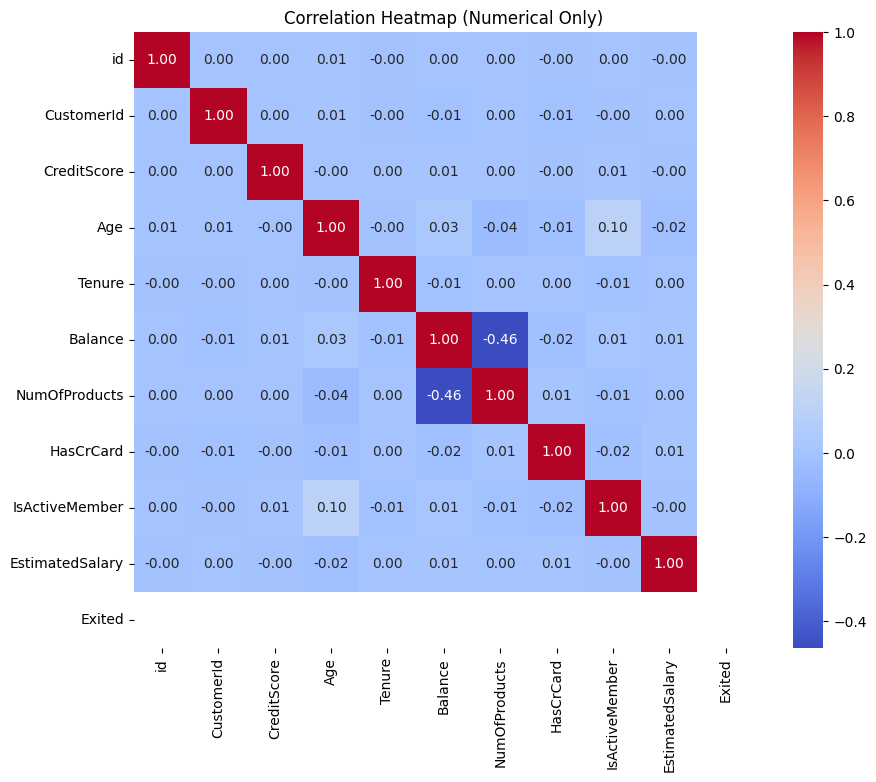

In [30]:
#CORR heatmap

import seaborn as sns

numerical_df2_true = df2_true.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_df2_true.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap (Numerical Only)')
plt.show()


In [1]:
# df2_false ---------------------------------------------------------------------

In [13]:
df2_false

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165028,165028,15704770,Oluchukwu,630,France,Male,50.0,8,0.00,2,1.0,1.0,5962.50,0
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


In [21]:
# no missing values

any_missing = df2_false.isnull().any().any()

print(any_missing)

rows, columns = df2_false.shape

print("# Rows:", rows)
print("# Columns:", columns)

False
# Rows: 130113
# Columns: 13


In [27]:
# Descriptive Stats

descriptive_stats = df2_false.describe()

print(descriptive_stats)

                  id    CustomerId    CreditScore            Age  \
count  130113.000000  1.301130e+05  130113.000000  130113.000000   
mean    82454.495416  1.569237e+07     657.590710      36.560480   
std     47668.960691  7.126773e+04      79.785902       8.147944   
min         0.000000  1.556570e+07     350.000000      18.000000   
25%     41168.000000  1.563385e+07     599.000000      31.000000   
50%     82519.000000  1.569067e+07     662.000000      36.000000   
75%    123697.000000  1.575688e+07     711.000000      40.000000   
max    165032.000000  1.581569e+07     850.000000      92.000000   

              Tenure        Balance  NumOfProducts      HasCrCard  \
count  130113.000000  130113.000000  130113.000000  130113.000000   
mean        5.048796   51255.807752       1.615273       0.758894   
std         2.799985   62189.978970       0.494632       0.427756   
min         0.000000       0.000000       1.000000       0.000000   
25%         3.000000       0.000000       

In [ ]:
# DROPPING the "Surname" feature. It is not very relevant to predicting churn. (USED)

df2_false = df2_false.drop(columns=['Surname'])

In [20]:
# Numerical vs. Categorical features

numerical_features = df2_false.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df2_false.select_dtypes(include=['object', 'category']).columns

numerical_features_count = len(numerical_features)
categorical_features_count = len(categorical_features)

dtypes = df2_false.dtypes

print("Numerical Features:", numerical_features_count)
print("Categorical Features:", categorical_features_count)

Numerical Features: 11
Categorical Features: 2


In [23]:
#Using IQR to look for outliers

outliers_dict = {}

for column in df2_false.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df2_false[column].quantile(0.25)
    Q3 = df2_false[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2_false[(df2_false[column] < lower_bound) | (df2_false[column] > upper_bound)]
    outliers_dict[column] = outliers

for column, outlier_data in outliers_dict.items():
    print(f"Outliers in {column} column:")
    print(outlier_data, "\n")

Outliers in id column:
Empty DataFrame
Columns: [id, CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: [] 

Outliers in CustomerId column:
Empty DataFrame
Columns: [id, CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: [] 

Outliers in CreditScore column:
            id  CustomerId  CreditScore Geography  Gender   Age  Tenure  \
35          35    15661591          413   Germany    Male  28.0       3   
169        169    15612494          359    France  Female  44.0       6   
529        529    15699772          428   Germany  Female  32.0       3   
705        705    15597131          415    France    Male  32.0       5   
1161      1161    15711396          427     Spain    Male  39.0       8   
...        ...         ...          ...       ...     ...   ...     ...   
162508  162508    15765173          350

In [24]:
# Table for df2_false

from tabulate import tabulate

def get_type(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Numerical'
    else:
        return 'Categorical'

def get_values(col):
    if pd.api.types.is_numeric_dtype(col):
        return f"{col.min()} to {col.max()}"
    else:
        return ', '.join(map(str, col.unique()))

def get_outliers_count(col):
    if pd.api.types.is_numeric_dtype(col):
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return ((col < lower_bound) | (col > upper_bound)).sum()
    else:
        return "N/A"

def get_mean(col):
    if pd.api.types.is_numeric_dtype(col):
        return col.mean()
    else:
        return "N/A"

info_table = pd.DataFrame({
    'Feature': df2_false.columns,
    'Type': df2_false.apply(lambda col: get_type(col)),
    'Values/Range': df2_false.apply(lambda col: get_values(col)),
    'Missing Values': df2_false.isnull().sum(),
    'Data Type': df2_false.dtypes,
    'Outliers Count': df2_false.apply(lambda col: get_outliers_count(col)),
    'Mean': df2_false.apply(lambda col: get_mean(col))
})

print(tabulate(info_table, headers='keys', tablefmt='pipe', showindex=False))


| Feature         | Type        | Values/Range           |   Missing Values | Data Type   | Outliers Count   | Mean               |
|:----------------|:------------|:-----------------------|-----------------:|:------------|:-----------------|:-------------------|
| id              | Numerical   | 0 to 165032            |                0 | int64       | 0                | 82454.49541552343  |
| CustomerId      | Numerical   | 15565701 to 15815690   |                0 | int64       | 0                | 15692372.926817458 |
| CreditScore     | Numerical   | 350 to 850             |                0 | int64       | 221              | 657.5907096139509  |
| Geography       | Categorical | France, Spain, Germany |                0 | object      | N/A              | N/A                |
| Gender          | Categorical | Male, Female           |                0 | object      | N/A              | N/A                |
| Age             | Numerical   | 18.0 to 92.0           |                0 

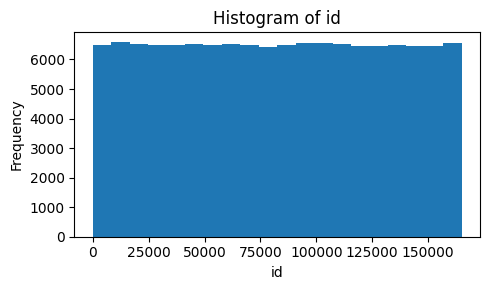

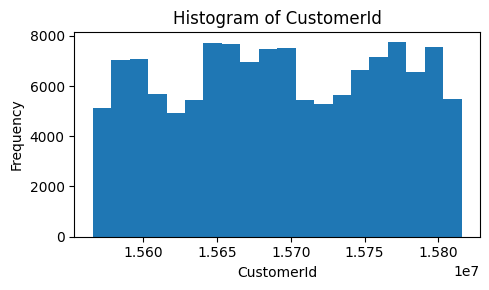

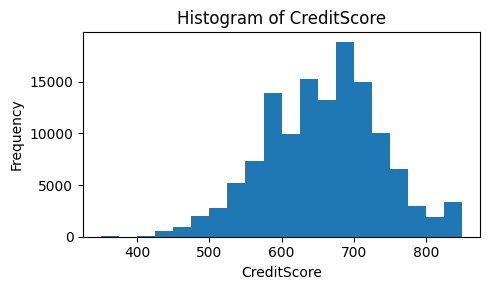

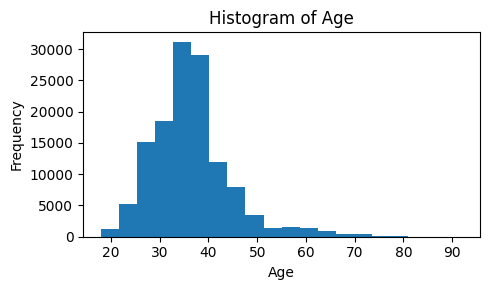

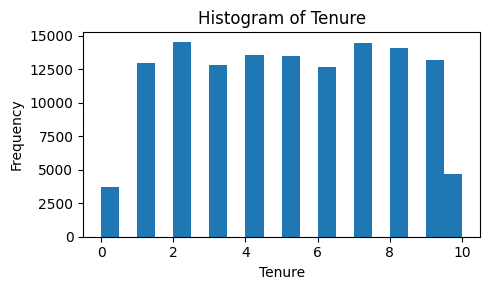

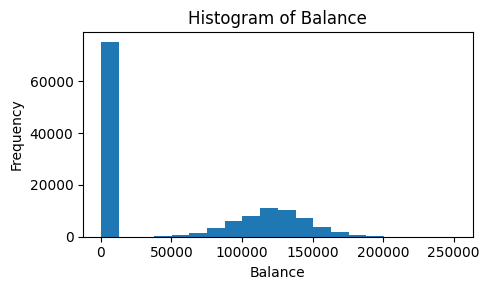

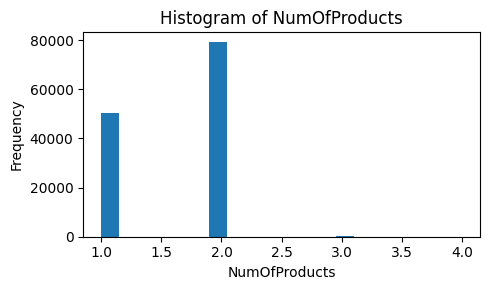

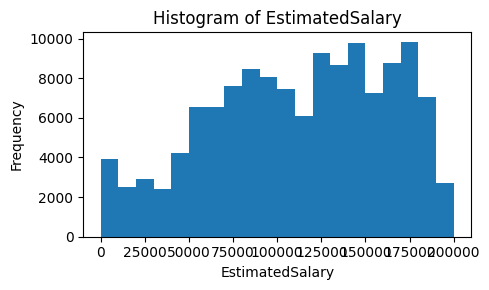

In [55]:
#Making Histograms for df2_false

import matplotlib.pyplot as plt

exclude_columns = ['HasCrCard', 'Exited', 'IsActiveMember']

numerical_cols = df2_false.select_dtypes(include=['int64', 'float64']).columns
cols_to_plot = [col for col in numerical_cols if col not in exclude_columns]

for col in cols_to_plot:
    plt.figure(figsize=(5, 3))
    df2_false[col].hist(bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.tight_layout() 
    plt.show()


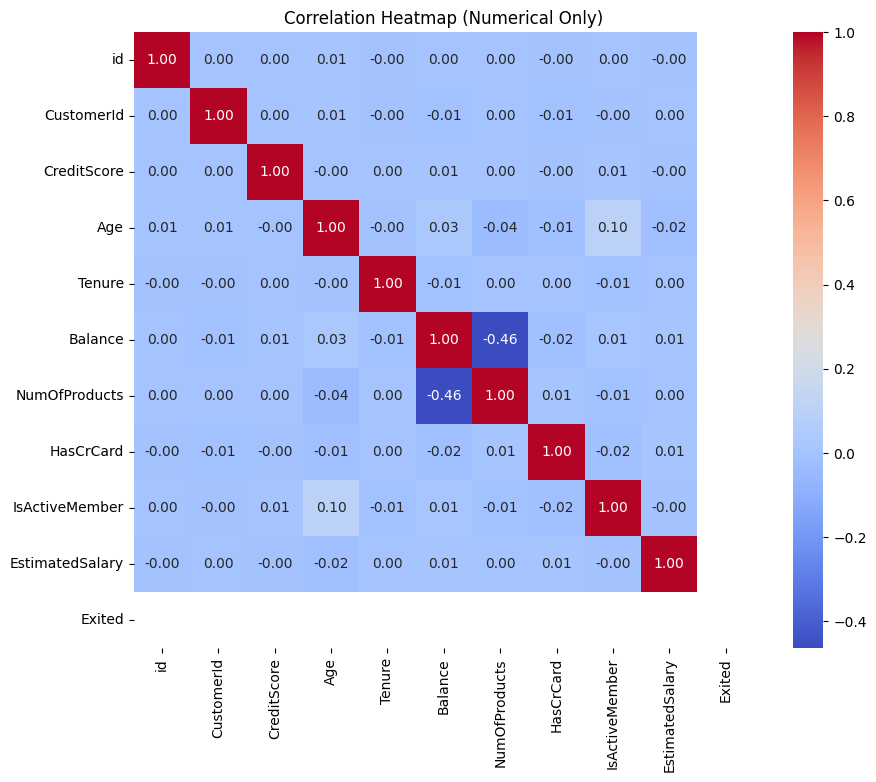

In [29]:
#CORR heatmap

import seaborn as sns

numerical_df2_false = df2_false.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_df2_false.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap (Numerical Only)')
plt.show()


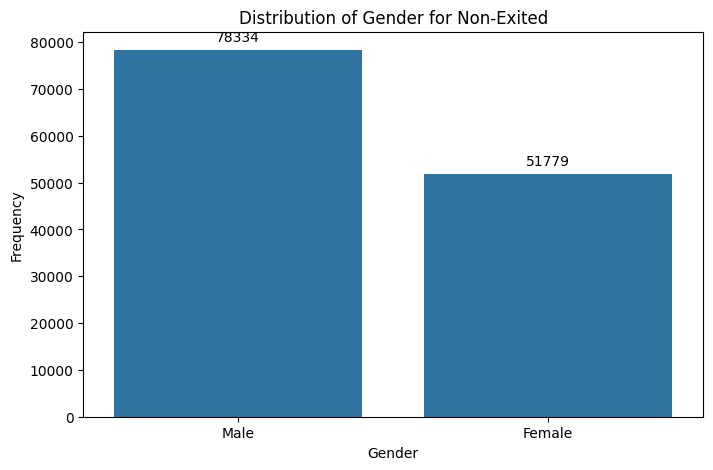

In [48]:
# Bar Graph for Gender

# Plot for df2_false
gender_counts_false = df2_false['Gender'].value_counts()
plt.figure(figsize=(8, 5))
barplot_false = sns.barplot(x=gender_counts_false.index, y=gender_counts_false.values)
plt.title('Distribution of Gender for Non-Exited')
plt.xlabel('Gender')
plt.ylabel('Frequency')
for p in barplot_false.patches:
    barplot_false.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center',
                           xytext=(0, 9),
                           textcoords='offset points')
plt.show()


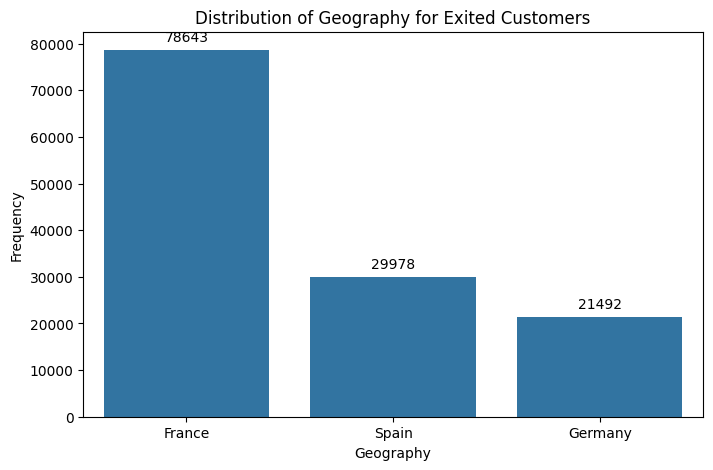

In [50]:
#Bar Graph for Geography

geography_counts_false = df2_false['Geography'].value_counts()

plt.figure(figsize=(8, 5))
barplot_false = sns.barplot(x=geography_counts_false.index, y=geography_counts_false.values)
plt.title('Distribution of Geography for Exited Customers')
plt.xlabel('Geography')
plt.ylabel('Frequency')

#Add number
for p in barplot_false.patches:
    barplot_false.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()


Seems to be an insignificant difference between the churn sample and the stayed sample. On its surface, the data seems to be distributed the same regardless of which class the data frame is based on.